<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [32]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


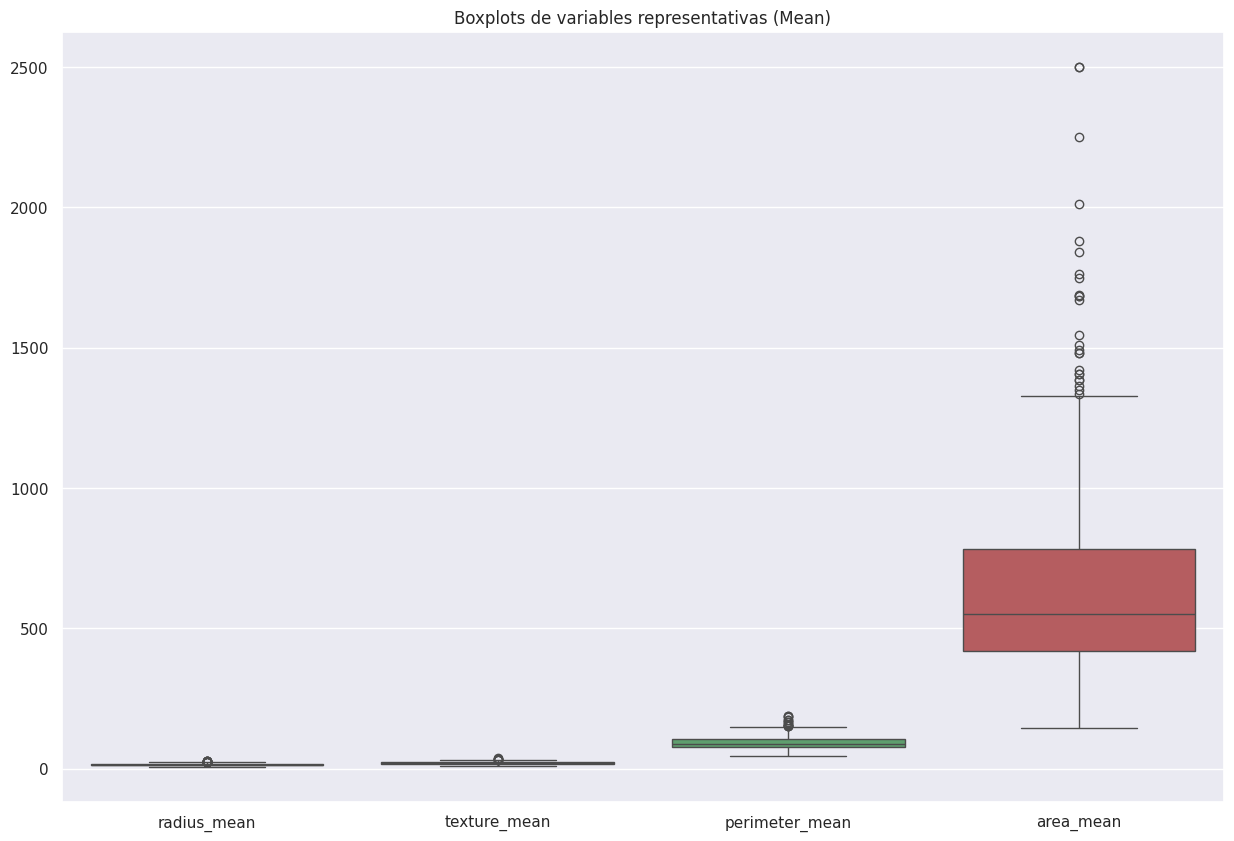

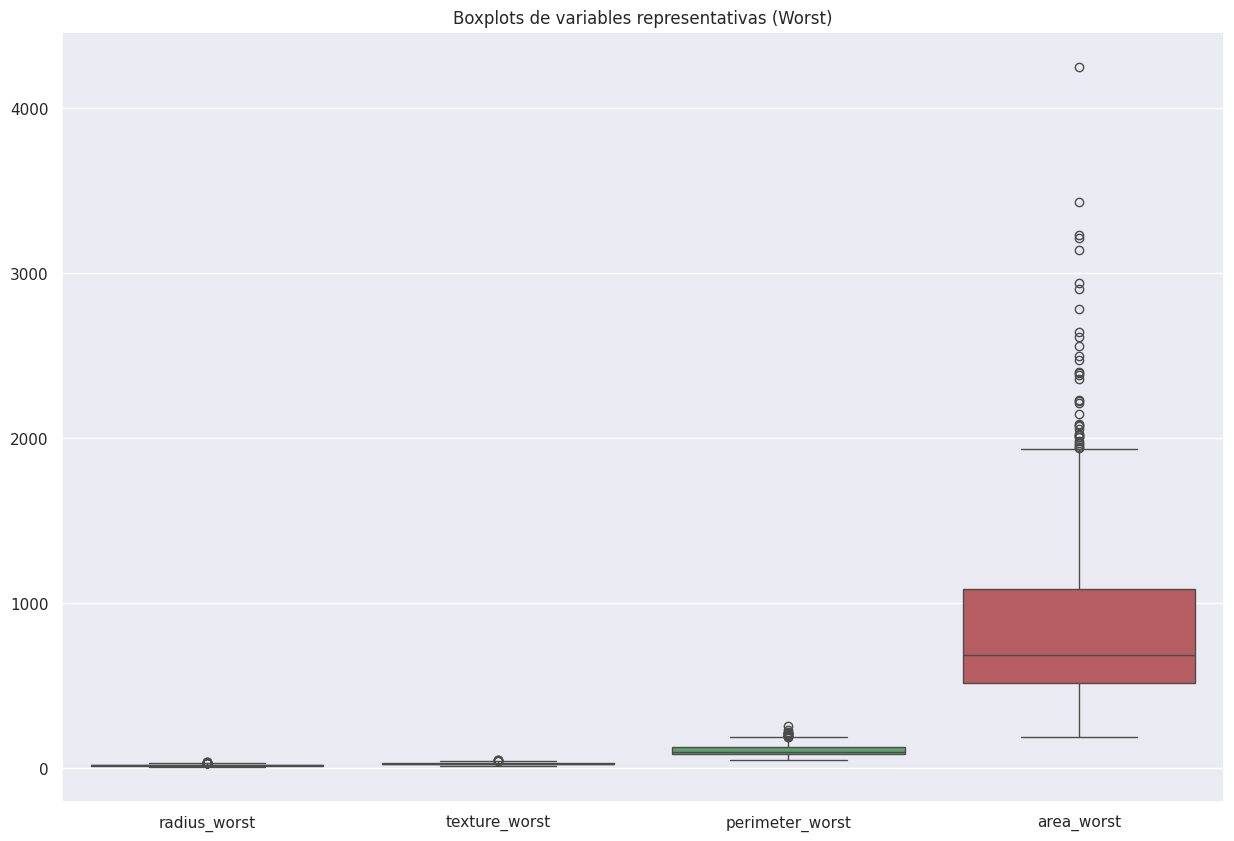

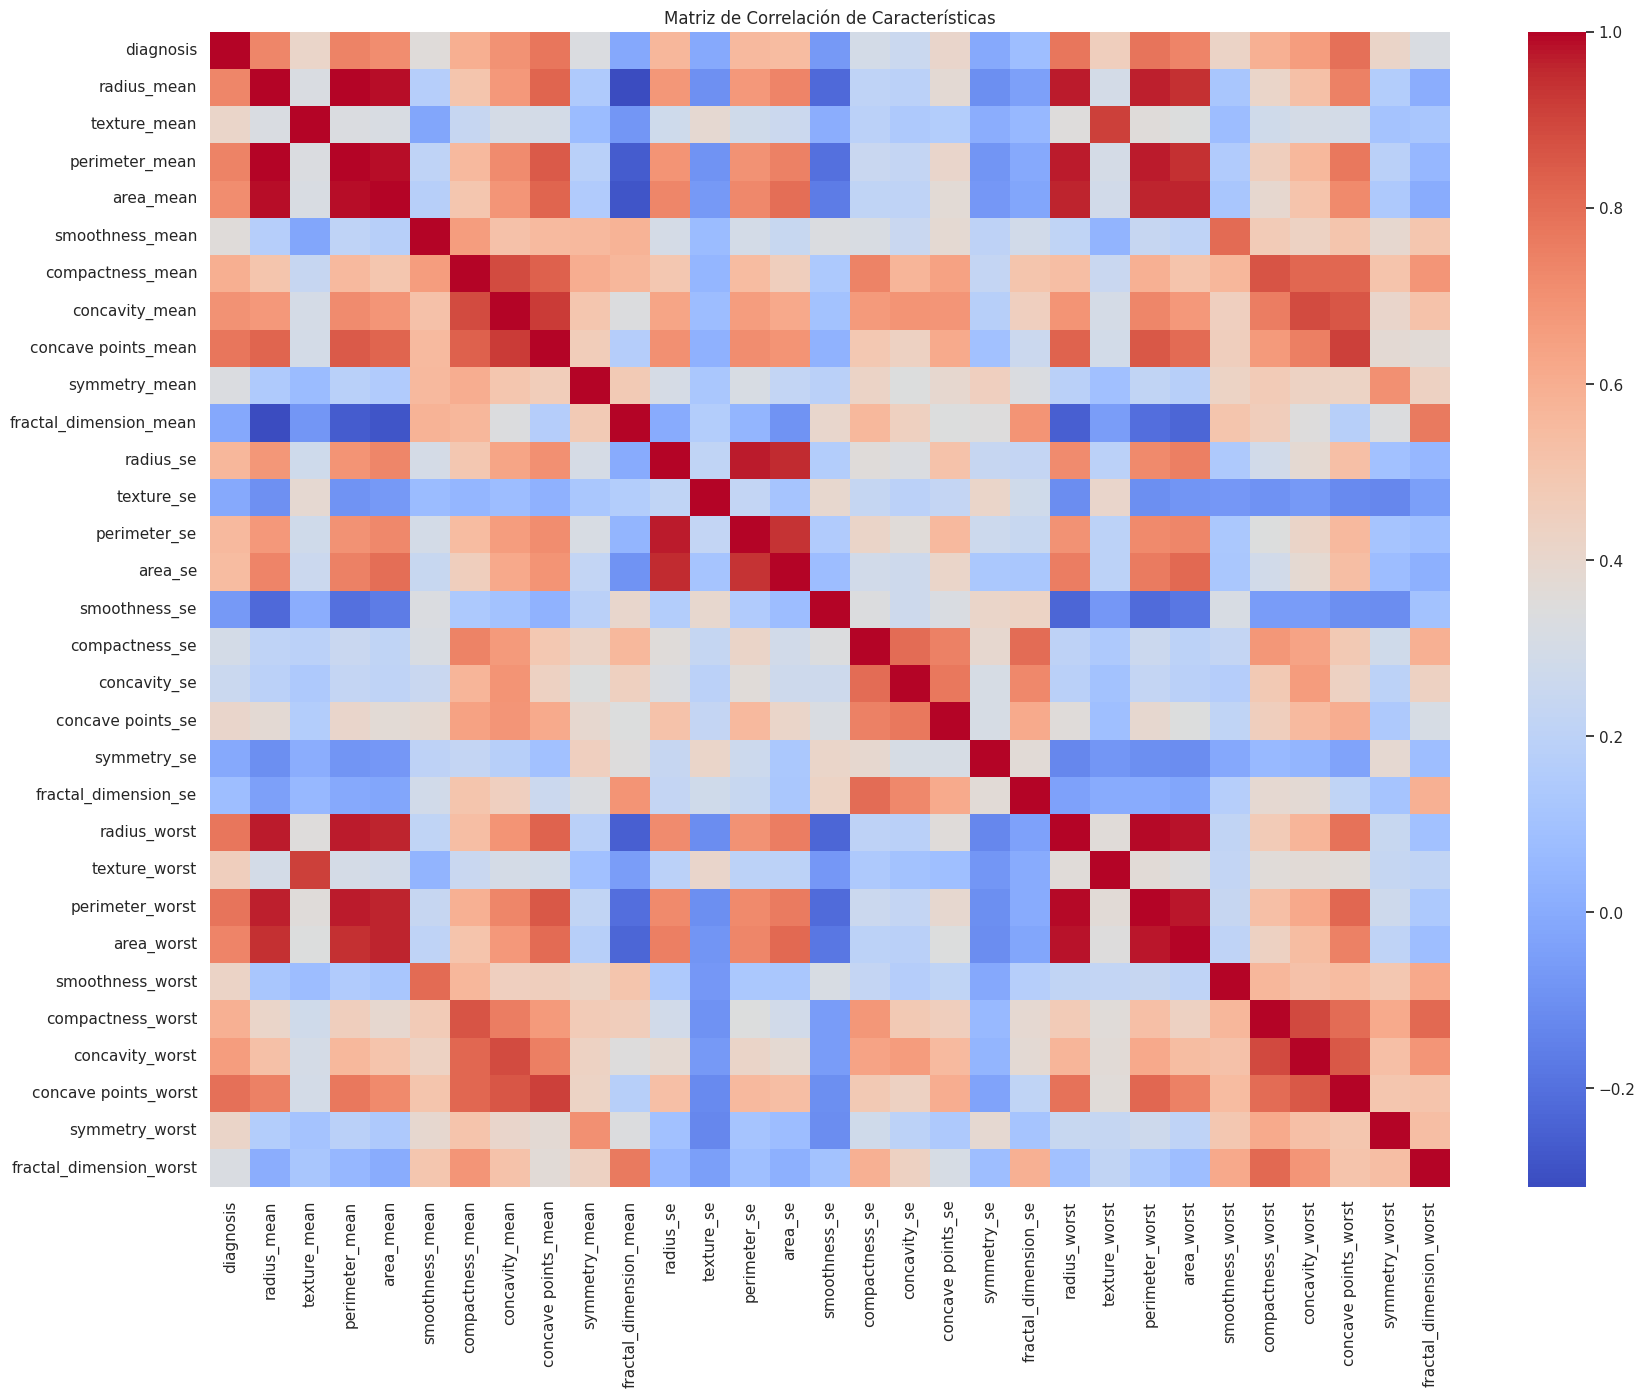

In [33]:
#Graficas y distribucion de las variables de df
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']])
plt.title('Boxplots de variables representativas (Mean)')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']])
plt.title('Boxplots de variables representativas (Worst)')
plt.show()


#Correlacion entre las variables del df
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de Características')
plt.show()



Se han hecho graficos de boxplot para identificar outliers de las que parecen ser varibles importantes por nombre. A priori, se notan muchos outliers. Sin embargo, hasta ahora no se puede decir nada de estos.

Por otro lado, se realiza una matriz de calor para identificar las variables con mayor correlación entre sí.
De donde se obtiene que las variables correspondientes a permitro, area, concavidad y textura son la que tienen mayor correlación. Por ello, se realizará una comparación entre ellas.

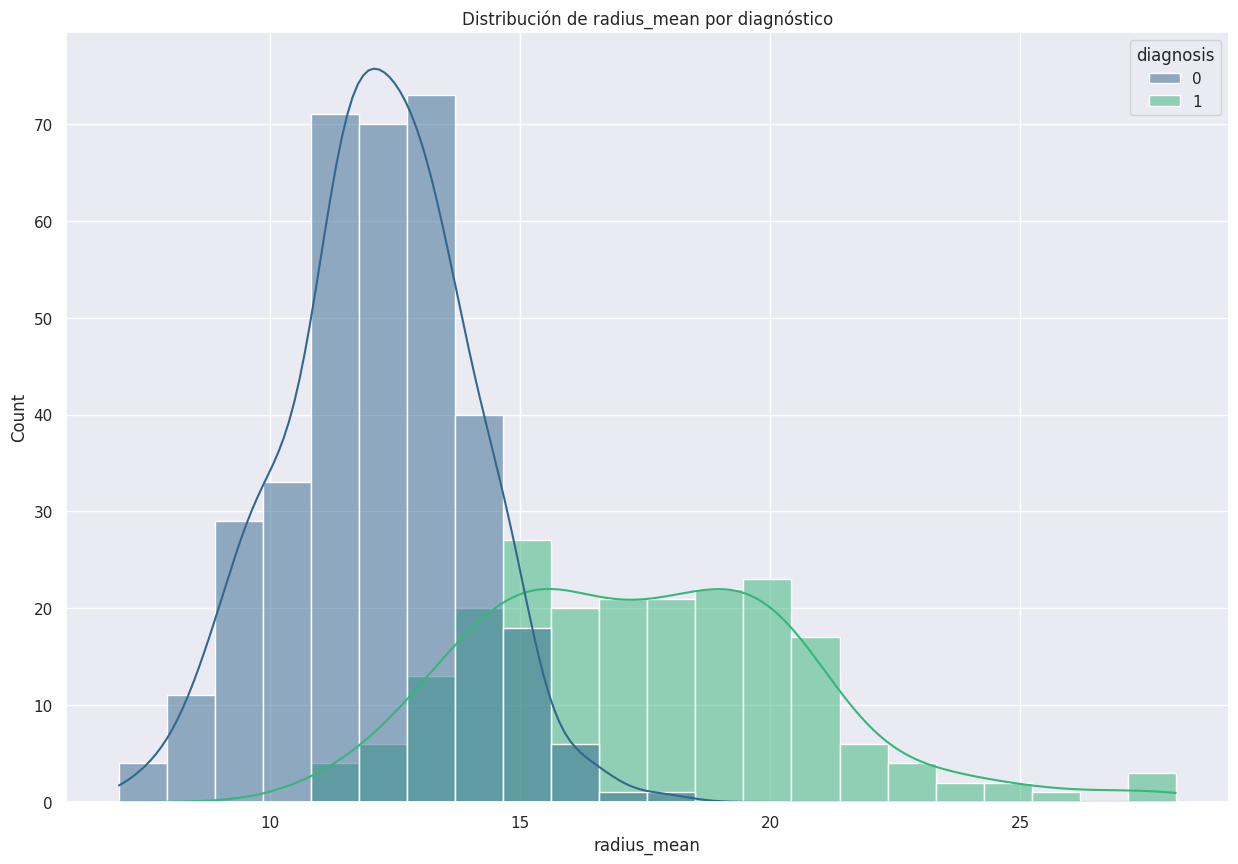

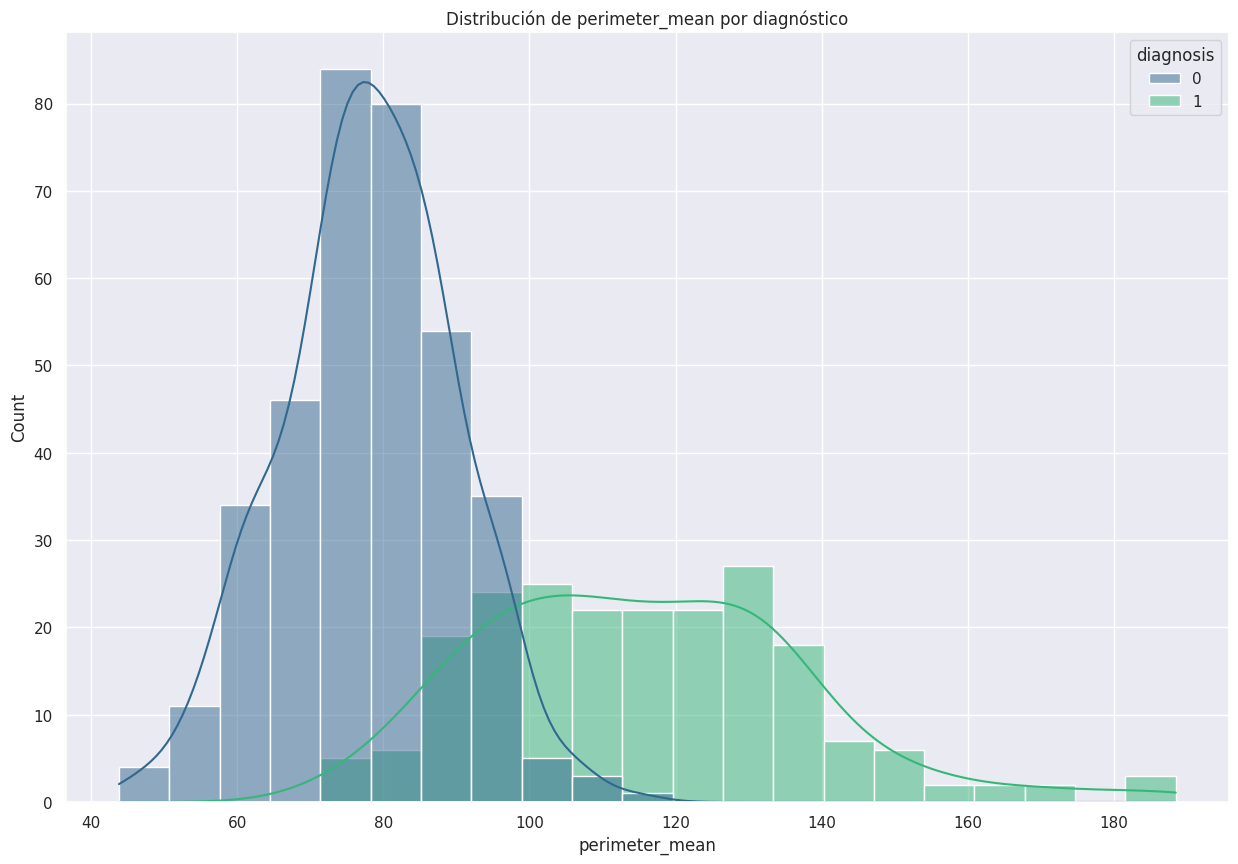

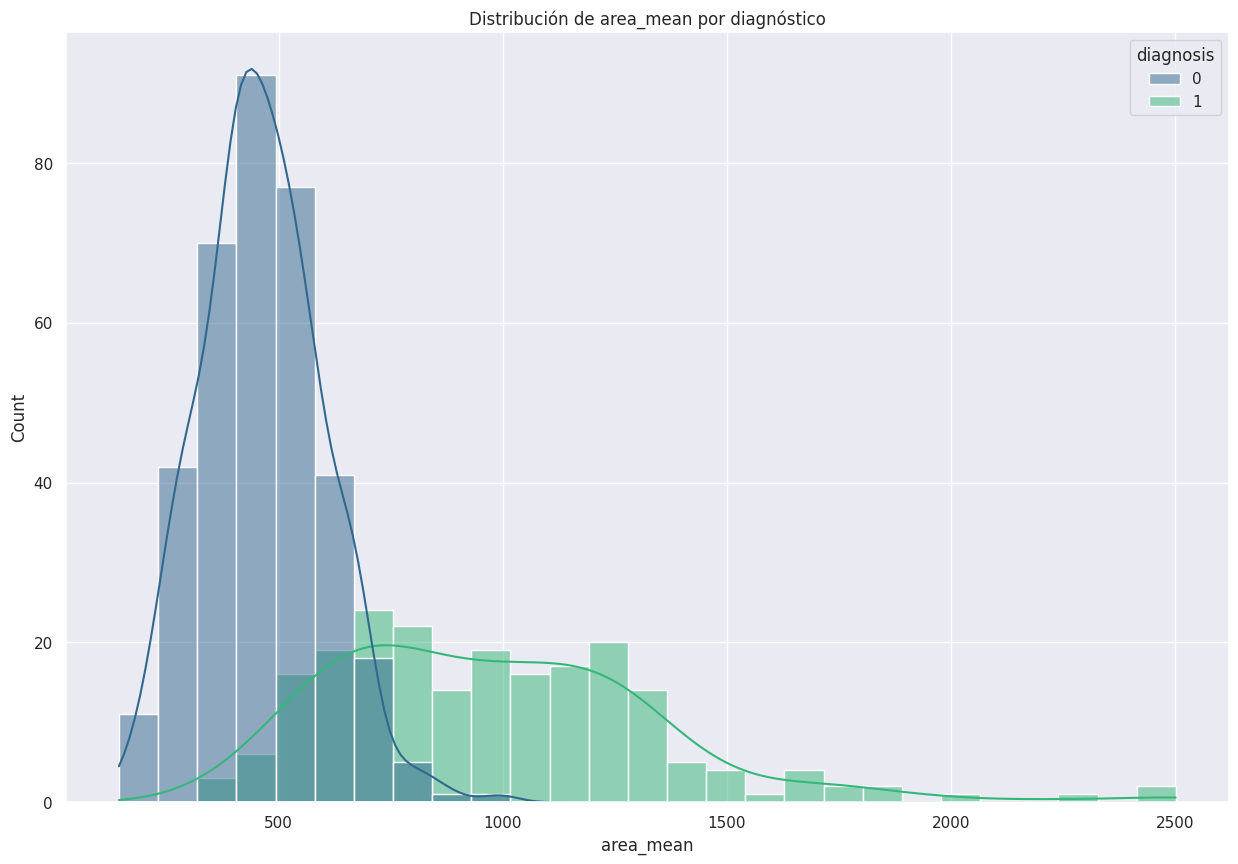

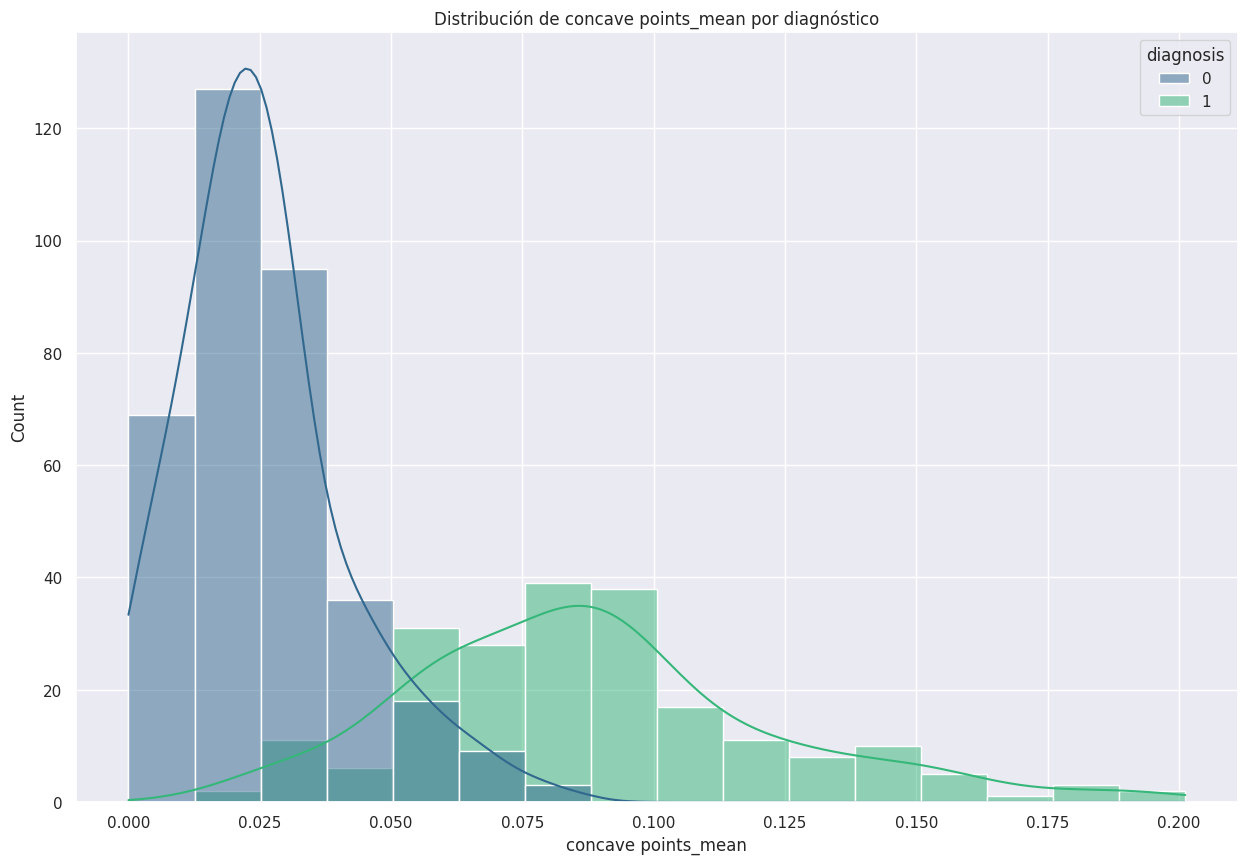

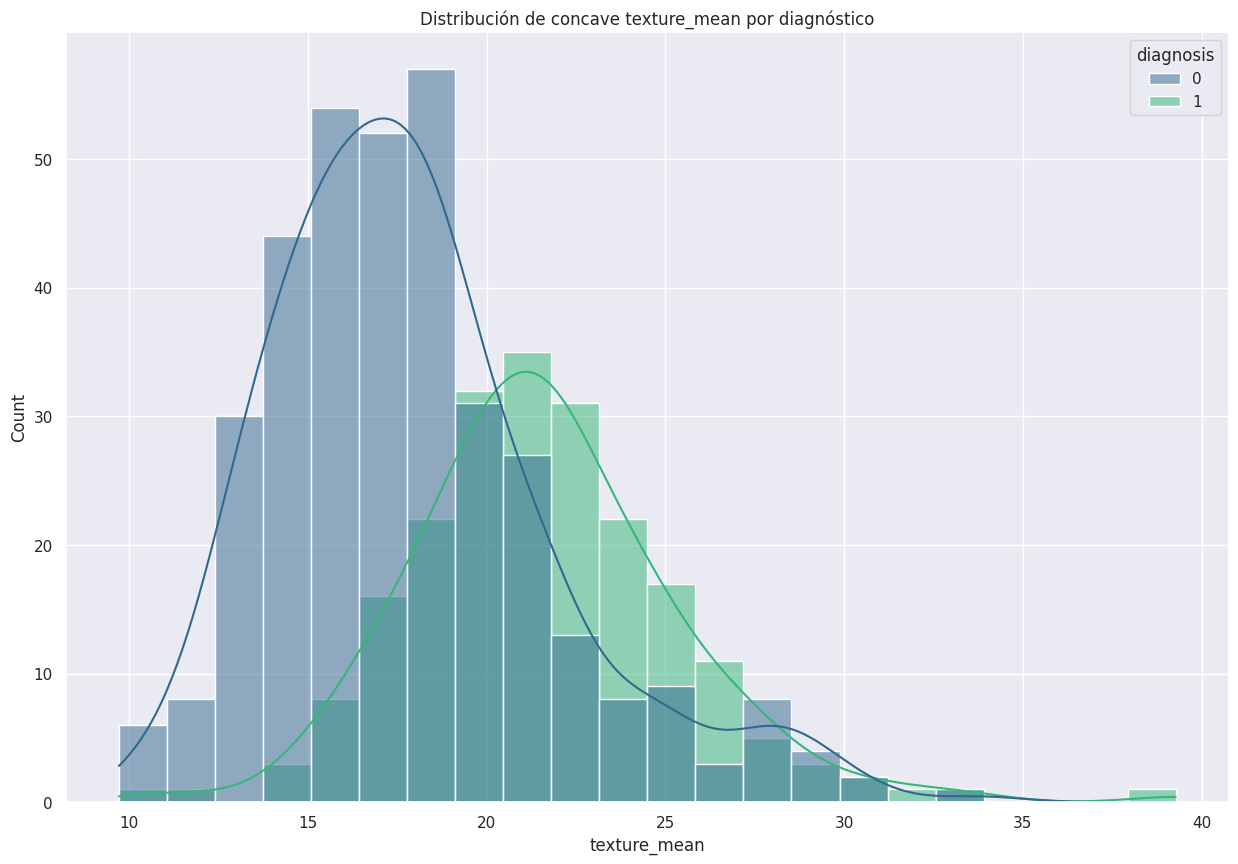

In [25]:
#Histograms para algunas variables con alta correlación con la variable objetivo
plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='viridis')
plt.title('Distribución de radius_mean por diagnóstico')
plt.show()

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', kde=True, palette='viridis')
plt.title('Distribución de perimeter_mean por diagnóstico')
plt.show()

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='area_mean', hue='diagnosis', kde=True, palette='viridis')
plt.title('Distribución de area_mean por diagnóstico')
plt.show()

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='concave points_mean', hue='diagnosis', kde=True, palette='viridis')
plt.title('Distribución de concave points_mean por diagnóstico')
plt.show()

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='texture_mean', hue='diagnosis', kde=True, palette='viridis')
plt.title('Distribución de concave texture_mean por diagnóstico')
plt.show()

De los histogramas se desprende que existe una diferencia entre promedio y distribuciones notoria entre las variables antes mencionadas. Esto da un indicio de que pueden ser las variables predictoras a un tumor benigno o no.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [26]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)


# Calcular la matriz de correlación de las características escaladas
correlation_matrix_scaled = X_scaled_df.corr()
upper = correlation_matrix_scaled.where(np.triu(np.ones(correlation_matrix_scaled.shape), k=1).astype(bool))

# Encontrar las columnas con correlación absoluta superior a un umbral
umbral = 0.9
to_drop = [column for column in upper.columns if any(upper[column].abs() > umbral)]

print("Variables a eliminar debido a alta multicolinealidad:", to_drop)

# Eliminar las columnas identificadas del DataFrame escalado
X_preprocessed = X_scaled_df.drop(columns=to_drop)

print("\nDataFrame después de eliminar variables con alta multicolinealidad:")
display(X_preprocessed.head())



Variables a eliminar debido a alta multicolinealidad: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

DataFrame después de eliminar variables con alta multicolinealidad:


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015
842517,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190
84300903,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391
84348301,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041,4.935010
84358402,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353,-0.397100


Se usa StandarScaler por que las varianzas no son tan grandes respecto al promedio y por que es el mejor que funciona para algoritmos de Machine Learning como SVM, Regresión Logística, PCA.
Debido a lo que se vio en el mapa de calor en la primera parte, se optara por descartar las variables con multicolinealidad para evitar redundancia y eliminar variables que aportan información similar.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Se optara por PCA. Primero se realiza el diagrama de codo para determinar la cantidad de PCA a realizar

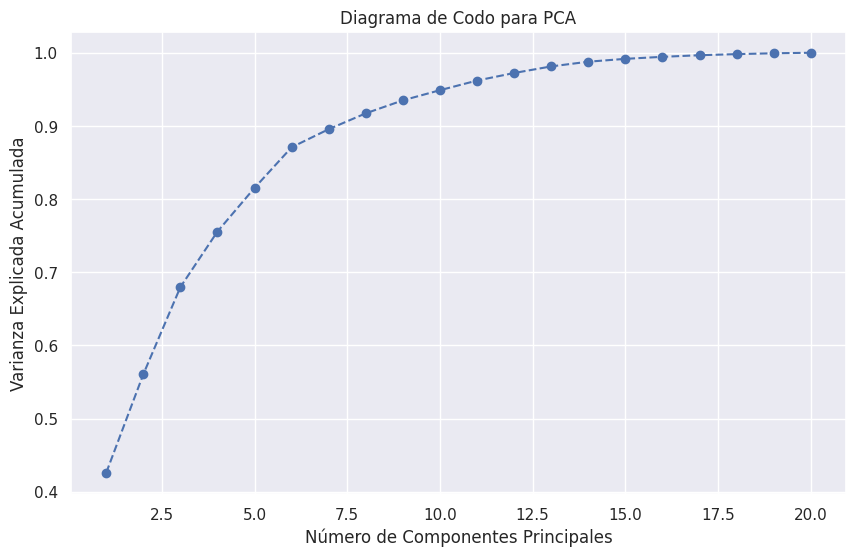

In [27]:
# Aplicar PCA para determinar el número óptimo de componentes
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_preprocessed)

# Calcular la varianza explicada acumulada
explained_variance_ratio_cumsum = np.cumsum(pca_full.explained_variance_ratio_)

# Visualizar el diagrama de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.title('Diagrama de Codo para PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()


Según el grafico de codo, basta con 5 a 7 dimensiones de PCA

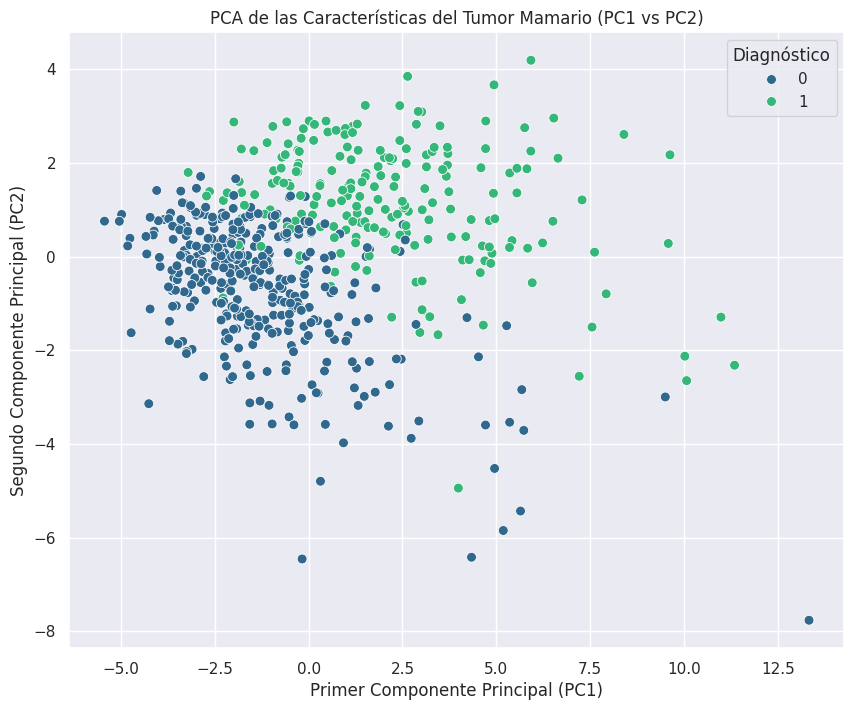

Varianza explicada por PC1: 0.4261
Varianza explicada por PC2: 0.1345
Varianza total explicada por los 6 componentes principales: 0.8708


In [28]:

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_preprocessed)

# Crear un DataFrame con los componentes principales y el diagnóstico
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X_preprocessed.index)
pca_df['diagnosis'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='viridis', s=50)
plt.title('PCA de las Características del Tumor Mamario (PC1 vs PC2)')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.legend(title='Diagnóstico', loc='upper right')
plt.grid(True)
plt.show()

# Analizar la varianza explicada por los componentes
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Varianza total explicada por los {pca.n_components} componentes principales: {pca.explained_variance_ratio_.sum():.4f}")


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42, stratify=y)

# 1. Regresión Logística
print("Entrenando y optimizando Regresión Logística...")
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_
print(f"Mejores parámetros para Regresión Logística: {grid_search_lr.best_params_}")

# 2. SVM
print("\nEntrenando y optimizando SVM...")
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
print(f"Mejores parámetros para SVM: {grid_search_svm.best_params_}")

# 3. Random Forest
print("\nEntrenando y optimizando Random Forest...")
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")

Entrenando y optimizando Regresión Logística...
Mejores parámetros para Regresión Logística: {'C': 0.1}

Entrenando y optimizando SVM...
Mejores parámetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Entrenando y optimizando Random Forest...
Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 500}


Una vez entrenados los modelos optimizados, procedemos a evaluar su rendimiento en el conjunto de prueba.

Evaluando modelos...

--- Logistic Regression ---
Accuracy: 0.9580
Precision: 0.9796
Recall: 0.9057
F1 Score: 0.9412
AUC-ROC: 0.9969
Confusion Matrix:
 [[89  1]
 [ 5 48]]

--- SVM ---
Accuracy: 0.9510
Precision: 0.9423
Recall: 0.9245
F1 Score: 0.9333
AUC-ROC: 0.9872
Confusion Matrix:
 [[87  3]
 [ 4 49]]

--- Random Forest ---
Accuracy: 0.9371
Precision: 0.9783
Recall: 0.8491
F1 Score: 0.9091
AUC-ROC: 0.9888
Confusion Matrix:
 [[89  1]
 [ 8 45]]

Comparación de Métricas de Rendimiento:


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.958042,0.979592,0.905660,0.941176,0.996855
SVM,0.951049,0.942308,0.924528,0.933333,0.987212
Random Forest,0.937063,0.978261,0.849057,0.909091,0.988784


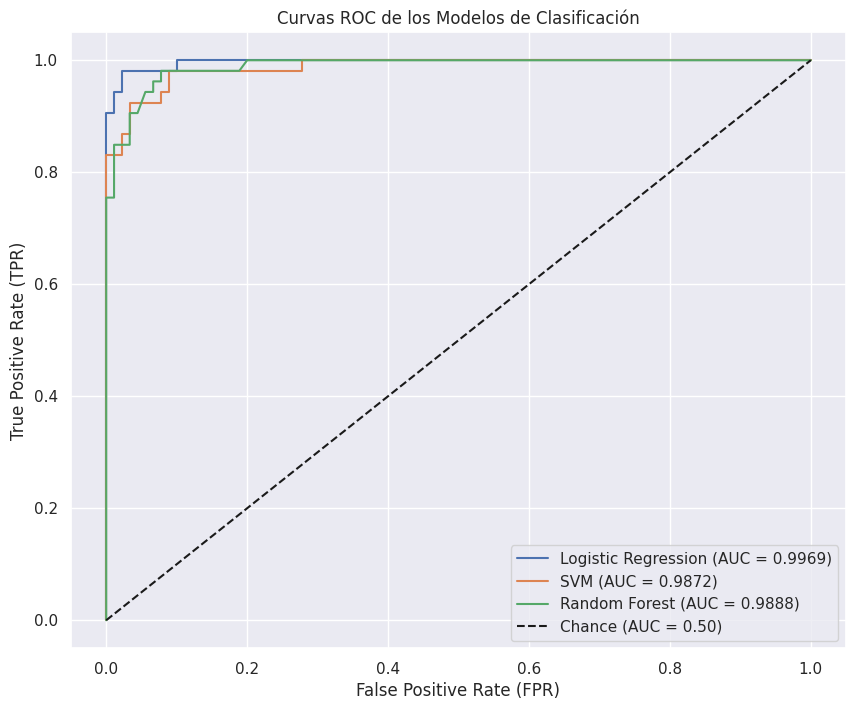

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

models = {
    'Logistic Regression': best_lr_model,
    'SVM': best_svm_model,
    'Random Forest': best_rf_model
}

results = {}

print("Evaluando modelos...")
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
    else: # For models that don't have predict_proba, like some SVM kernels
        y_decision = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_decision)
        roc_auc = auc(fpr, tpr)


    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'AUC-ROC': roc_auc,
        'FPR': fpr,
        'TPR': tpr
    }

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", cm)

# Comparar resultados en una tabla
results_df = pd.DataFrame({name: {k: v for k, v in res.items() if k not in ['Confusion Matrix', 'FPR', 'TPR']} for name, res in results.items()}).T
print("\nComparación de Métricas de Rendimiento:")
display(results_df)

# Visualizar curvas ROC
plt.figure(figsize=(10, 8))
for name, res in results.items():
    plt.plot(res['FPR'], res['TPR'], label=f'{name} (AUC = {res["AUC-ROC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curvas ROC de los Modelos de Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



En base a los resultados y la curva ROC, el modelo de Regresion Logistica es el mejor que generaliza a partir de las variables. Presenta la mayor acurracy de los otros 2 modelos y una mejor AUC-ROC. Esto es curioso, pues, el problema es de clasificación. Sin embargo, el modelo de regresion lineal rindió mucho mejor.

La reducción de dimensionalidad junto a la eliminacion por multicolinealidad son efectivas para reducir la cantidad de datos. Aunque, esto podria eliminar caracteristicas importantes o caracteristicas que pueden derivar en nuevas caracteristicas. Por ello, siempre es mejor respaldar la semenjanza de varianza con un test de hipotesis adecuado.

Por ello, las posibles mejoras, exceptuando probar nuevos modelos y ampliar la optimazación de hiperparametros, son un mejor analisis previo estadistico para determinar las variables importantes.